# Data Visualizations

Un proceso de análisis de datos se divide en las siguientes fases:
- Identificar.
- Recolectar.
- Limpiar.
- Analizar.
- Interpretar.

## Fundamentos de EDA

### Preparación de los datos.

   Es el proceso de recolectar, combinar, estructurar y organizar los datos de forma que puede ser utilizado por los equipos de BI, Analítica y aplicaciones de visualización de datos.

   Dento de los componentes que se incluyen en esta etapa, tenemos:

   - Preprocesamiento.
   - Limpieza.
   - Validación.
   - Transformación

### Análisis y Desarrollo.

La fase de análisis requiere de la combinación de varios skills como son:

- Matemáticas.
- Estadistica.
- Conocimiento del negocio.

Y justo en esta parte es en donde podremos entender mejor lo que sucede con nuestros datos y lo que tienen que decirnos. Aqui seremos capaces de detectar patrones y modelos que expliquen el comportamiento de nuestros datos.

### Representación de los resultados.

El duro trabajo realizado en en proceso de análisis de datos es solo tan efectivo como el método que usamos para presentarlos. Adaptar el formato de los resultados a nuestra audiencia, usar storytelling y apoyarnos lo más que podamos de herramientas especializadas.

## Tipos de Datos

Al comenzar a trabajar con datos, es importante identificar las características de los mismos durante el análisis.

![](Images/Data-types.jpeg)

## Transformaciones de variables

Podemos transformar variables dependiendo de las necesidades y el contexto, las principales transformaciones que tenemos son:

- Variables continuas a discretas.
- Cuantitativas a Cualitativas

## ¿Cómo escoger el mejor tipo de gráfica?

### Cambios a través del tiempo y datos categóricos

![](Images/Line.jpeg)

![](Images/Bar.jpeg)

### Comparación entre dos variables

![](Images/Scatter.jpeg)

### Datos acumulados

![](Images/Cumulative.jpeg)

### Histogramas

![](Images/Hist.jpeg)

### Boxplots

![](Images/Boxplot.jpeg)

# A ensuciarse las manos.

In [ ]:
! pip install seaborn 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

sns.set(font_scale = 0.7)

In [3]:
sismo_csv = "Files/SSNMX2.csv"
prod_csv = "Files/mapas_opt.ctesop_cdmx_refresco.csv"
raw_iris = "Files/Iris.csv"

In [ ]:
sismo_df = pd.read_csv(sismo_csv, skiprows=[0,1,2,3])
sismo_df.head()

In [226]:
sismo_df = pd.read_csv(sismo_csv, skiprows=[0,1,2,3], usecols=[0,2,3,4,5], na_values=['no calculable', 'en revision', 'menos de 1']#, parse_dates=['Fecha']
)
sismo_df['Fecha'] = pd.to_datetime(sismo_df['Fecha'], format='%Y-%m-%d')

sismo_df.shape

(91994, 5)

In [227]:
sismo_df = sismo_df.groupby('Fecha').first()
sismo_df

,Magnitud,Latitud,Longitud,Profundidad
Fecha,,,,
2020-01-01,3.4,16.3972,-97.4925,6.1
2020-01-02,4.1,16.9998,-94.0485,150.7
2020-01-03,3.2,16.2652,-98.1313,14.8
2020-01-04,3.9,14.9452,-93.2868,55.6
2020-01-05,3.9,17.1988,-95.1885,121.4
...,...,...,...,...
2023-02-13,3.6,18.1000,-103.2500,13.5
2023-02-14,3.6,19.3300,-104.1800,8.6
2023-02-15,3.9,18.5700,-106.2700,11.9


In [233]:
print(type(sismo_df))

<class 'pandas.core.frame.DataFrame'>


In [234]:
print(type(sismo_df['Magnitud']))

<class 'pandas.core.series.Series'>


In [228]:
sismo_df.shape

(1144, 4)

In [229]:
sismo_df.describe(include='all')

,Magnitud,Latitud,Longitud,Profundidad
count,1144.000000,1144.000000,1144.000000,1144.000000
mean,3.563024,18.027122,-99.469319,32.363899
std,0.314043,3.936531,5.588594,38.326258
min,1.100000,13.563300,-117.002000,1.900000
25%,3.400000,16.072950,-102.208250,9.475000
50%,3.600000,16.744350,-98.173300,16.100000
75%,3.800000,18.417525,-95.099575,39.875000
max,4.900000,32.455500,-90.801500,220.000000


<AxesSubplot:>

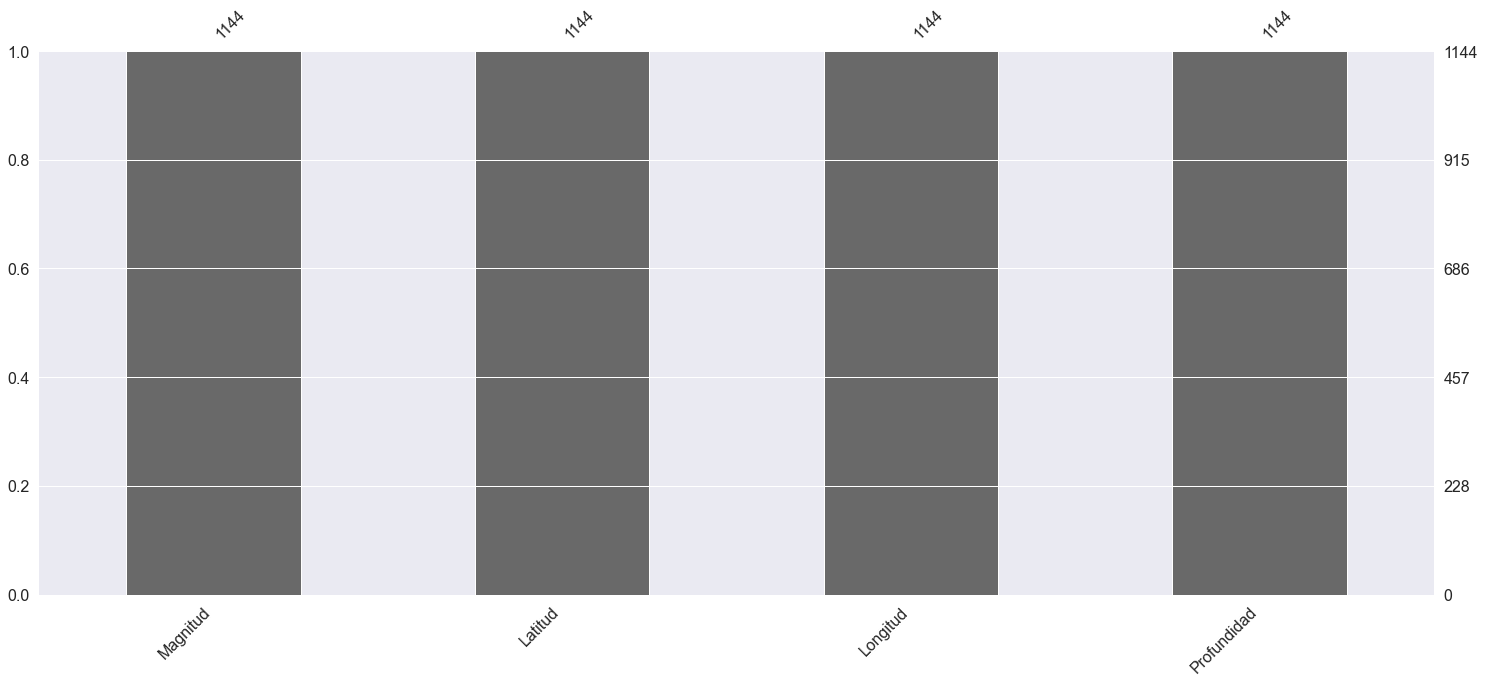

In [230]:
msno.bar(sismo_df)

La forma más simple

In [231]:
sample_data = np.arange(10)
sample_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

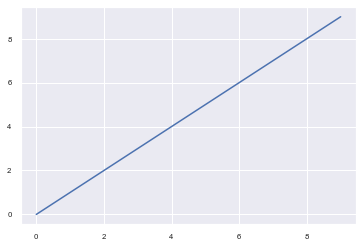

In [232]:
plt.plot(sample_data)

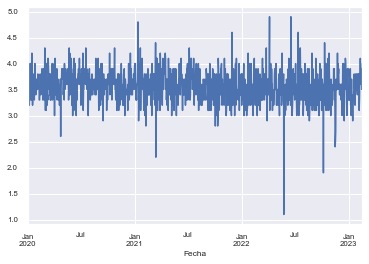

In [235]:
sismo_df["Magnitud"].plot()
plt.show()

In [236]:
sismos_fuertes = sismo_df.loc[sismo_df['Magnitud'] >= 4]
sismos_fuertes.shape

(100, 4)

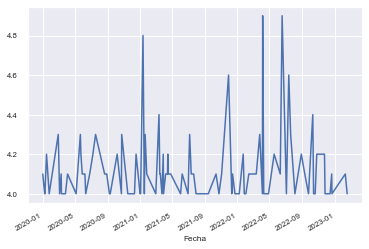

In [237]:
sismos_fuertes["Magnitud"].plot()
plt.show()

In [238]:
sismos_fuertes.head()

,Magnitud,Latitud,Longitud,Profundidad
Fecha,,,,
2020-01-02,4.1,16.9998,-94.0485,150.7
2020-01-09,4.0,17.0772,-94.7457,130.9
2020-01-10,4.0,14.3160,-92.9420,15.8
2020-01-16,4.2,16.4717,-95.1158,2.7
2020-01-26,4.0,19.4377,-102.2290,14.5


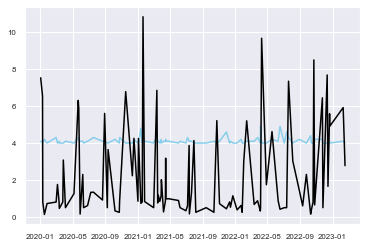

In [241]:
plt.plot('Magnitud', data=sismos_fuertes, color='skyblue')
#plt.plot('Profundidad', data=sismos_fuertes, color='olive')
plt.plot(sismos_fuertes['Profundidad']/20, data=sismos_fuertes, color='black')
plt.show()

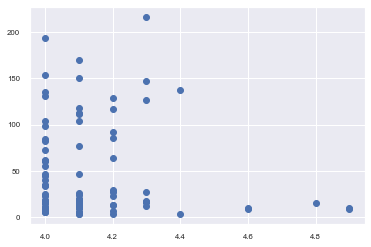

In [242]:
plt.scatter('Magnitud', 'Profundidad', data=sismos_fuertes)

## Jugando con Iris

In [243]:
iris = pd.read_csv(raw_iris, usecols=[1, 2, 3, 4, 5], skiprows=1, names = ['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [245]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

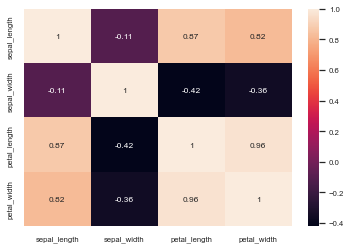

In [244]:
iris_corr_matrix = iris.corr()
sns.heatmap(iris_corr_matrix, annot=True)

In [247]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

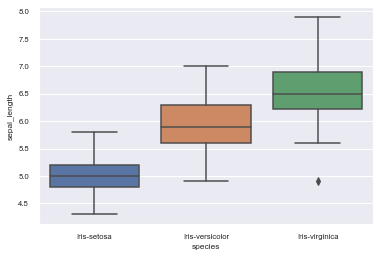

In [246]:
sns.boxplot(x=iris['species'], y=iris['sepal_length'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

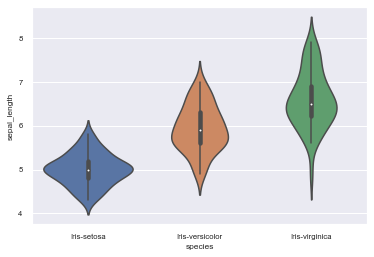

In [248]:
sns.violinplot('species', 'sepal_length', data = iris)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

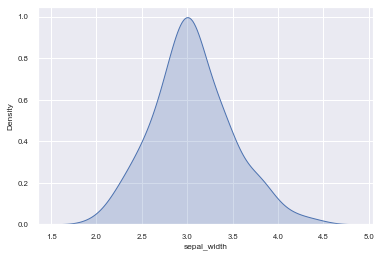

In [251]:
sns.kdeplot(iris['sepal_width'], shade = True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

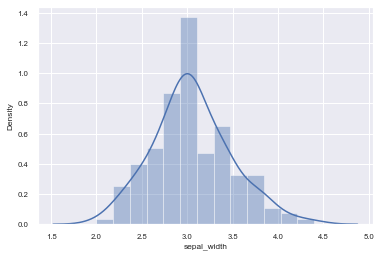

In [252]:
sns.distplot(a=iris['sepal_width'], hist = True, kde = True)

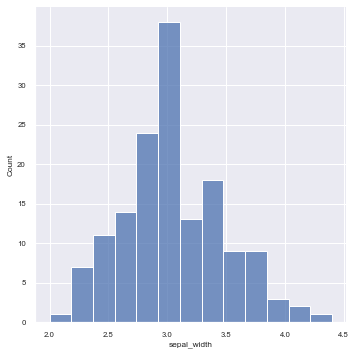

In [253]:
sns.displot(iris['sepal_width'])

<AxesSubplot:>

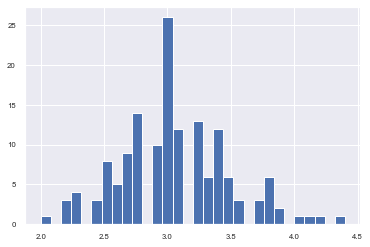

In [255]:
iris['sepal_width'].hist(bins=30)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


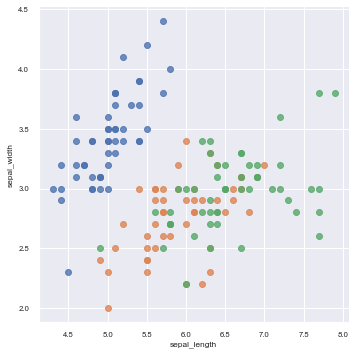

In [256]:
sns.lmplot('sepal_length', 'sepal_width', data = iris, hue = 'species', fit_reg=False, legend = False)
# plt.legend(loc='lower right')
# plt.show()

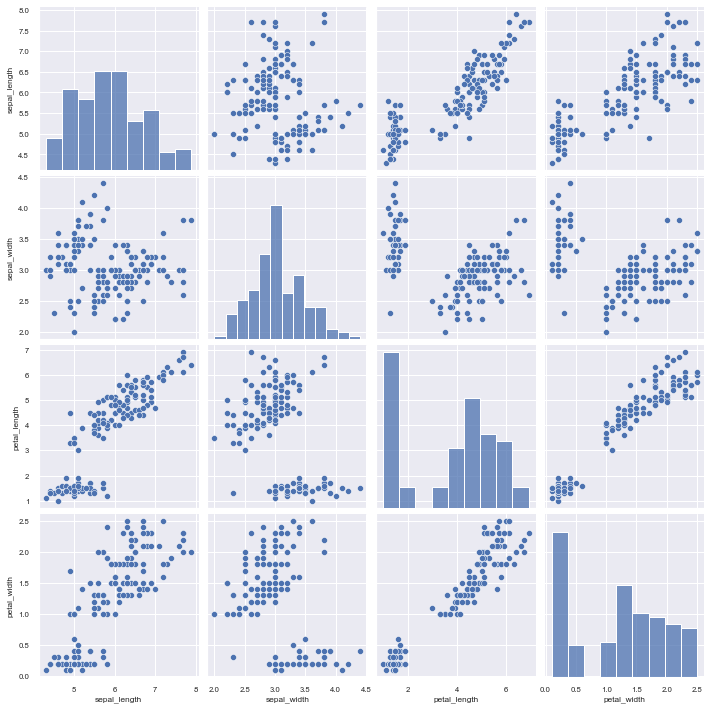

In [257]:
sns.pairplot(iris)

## Usando los datos de prod

In [4]:
df = pd.read_csv(prod_csv)
df.head()

,region,territorio,bodega,subcanal,clave_bodega,clave_cliente,coordx,coordy,vol_agosto,vol_septiembre,vol_octubre,vol8oz_agosto,vol8oz_septiembre,vol8oz_octubre,volumen_total,vol8oz_total,geomi
0,METRO,CRUCE ANDEN,CRUCE ANDEN,Empresas,13,17052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,METRO,EMPRESAS,METRO OFF TICKET,Bares y Cantinas,12,10495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,METRO,EMPRESAS,METRO OFF TICKET,Alimentos,12,62330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,METRO,CRUCE ANDEN,CRUCE ANDEN,Empresas,13,29655,NaN,NaN,-1.43,NaN,NaN,-4.417019,NaN,NaN,-1.43,-4.417019,NaN
4,METRO,CRUCE ANDEN,CRUCE ANDEN,Empresas,13,15257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20353 entries, 0 to 20352
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             20353 non-null  object 
 1   territorio         20353 non-null  object 
 2   bodega             20353 non-null  object 
 3   subcanal           20353 non-null  object 
 4   clave_bodega       20353 non-null  int64  
 5   clave_cliente      20353 non-null  int64  
 6   coordx             20278 non-null  float64
 7   coordy             20278 non-null  float64
 8   vol_agosto         14567 non-null  float64
 9   vol_septiembre     14279 non-null  float64
 10  vol_octubre        14458 non-null  float64
 11  vol8oz_agosto      14567 non-null  float64
 12  vol8oz_septiembre  14279 non-null  float64
 13  vol8oz_octubre     14458 non-null  float64
 14  volumen_total      17380 non-null  float64
 15  vol8oz_total       17380 non-null  float64
 16  geomi              202

In [260]:
df.describe(include ='object').T

,count,unique,top,freq
region,20353,1,METRO,20353
territorio,20353,9,PONIENTE,5590
bodega,20353,29,ROJO GOMEZ,2746
subcanal,20353,9,Alimentos,17297
geomi,20278,18607,0101000020E6100000000000C091D758C0000000C0D54B...,10


<AxesSubplot:>

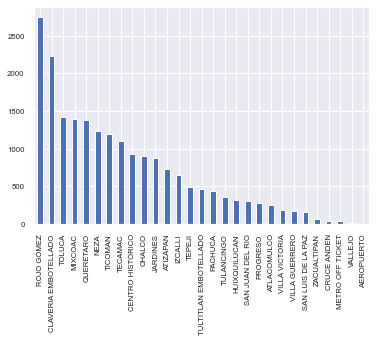

In [261]:
df['bodega'].value_counts().plot.bar()

<AxesSubplot:>

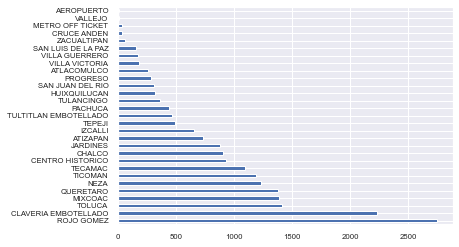

In [262]:
df['bodega'].value_counts().plot.barh()

<AxesSubplot:>

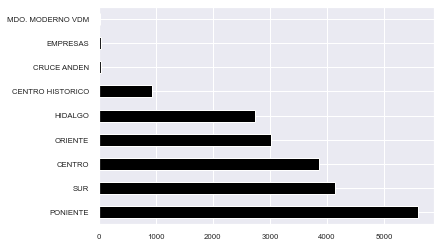

In [263]:
df['territorio'].value_counts().plot.barh(color='black')

In [ ]:
df.describe(exclude ='object').T

<AxesSubplot:>

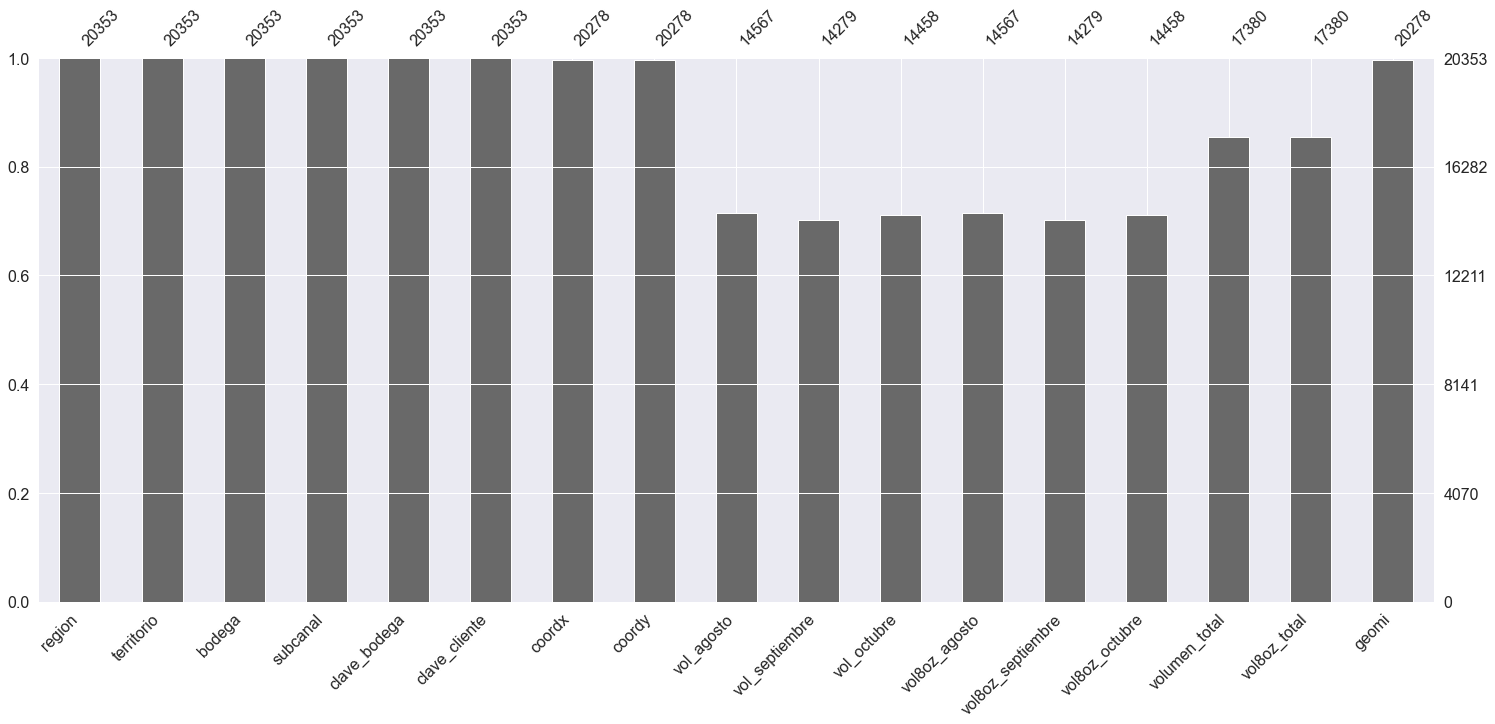

In [6]:
msno.bar(df)

<AxesSubplot:xlabel='territorio', ylabel='count'>

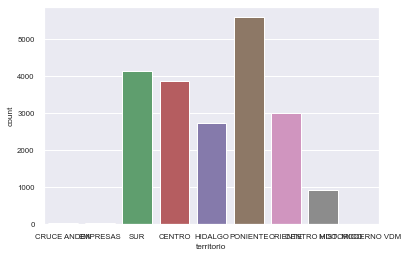

In [5]:
sns.countplot(x = 'territorio', data = df)

#a = sns.countplot(x = 'territorio', data = df)
#a.axes.set_title('Conteo por territorio')
#a.set_xlabel('Territorio', fontsize = 10)
#plt.show()

In [ ]:
df.groupby('territorio')['vol_agosto'].mean().plot.bar()

In [ ]:
plt.hist(df['volumen_total'], )